<a href="https://colab.research.google.com/github/FriddeFrid91/DynamicWebsite/blob/main/ML_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Take A Look At The Dataset

In [913]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Sales Transaction v.4a.csv')
df.head()
# So the dataset is a sales transcation concerning products being sold in different countries.

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [914]:
df.info()
# Checking what features we have and what datatypes they are.
# CustomerNo ist the only featre with missing values with 55 values missing.
null_values = df['CustomerNo'].isnull().sum()
print("CustomerNo", null_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB
CustomerNo 55


In [915]:
df.describe()
# Looking at the description of 'Price', shows that the price is some what consistent with a mean of 12.66 and standard devation of 8.49. Possible outlier with max of 660.62.
# 'Quantity' - standard deviation is very high with 216.66. The minimum quantity is -80 995 and highest is 80 995. Since a quatity can't be negative maybe this concerns a
# sales return and/or human error.
# 'CustomerNo' is maybe only relevant to the amount of CustomerNo with count.

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


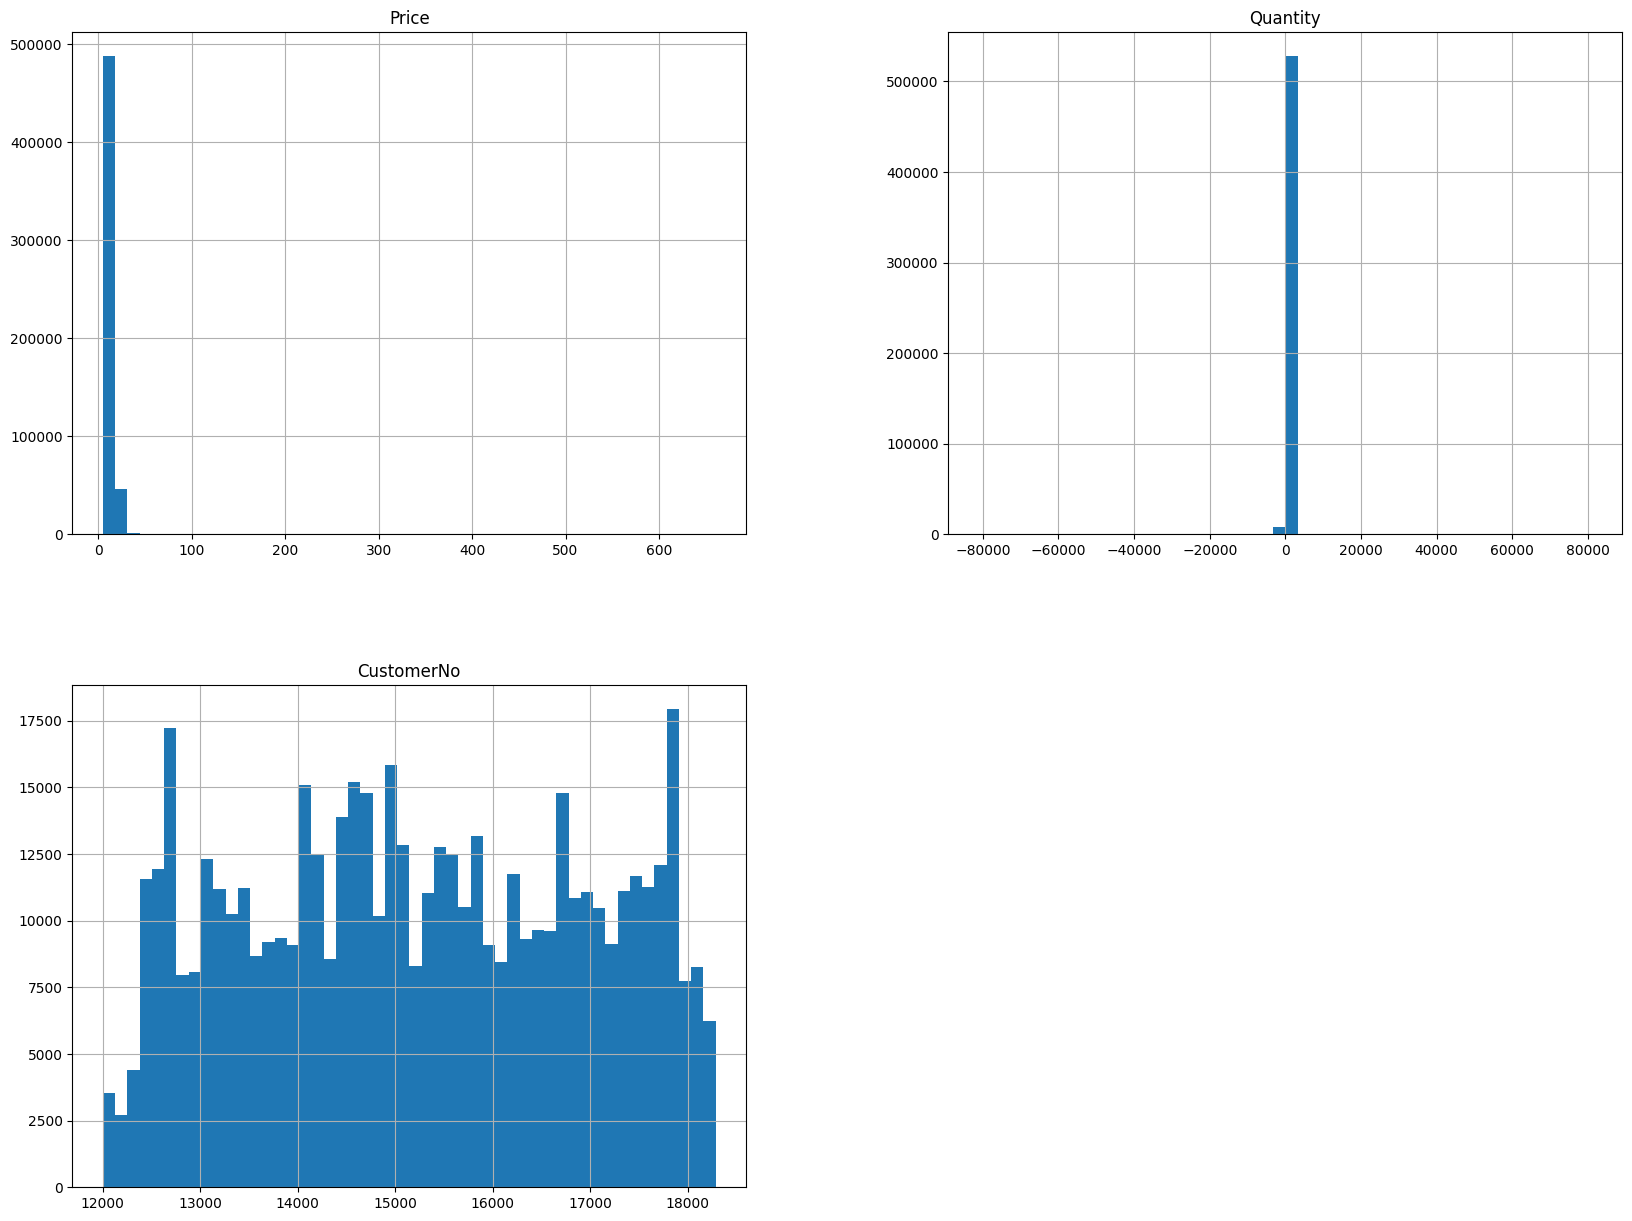

In [916]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()


**Test Set**

In [917]:
def train_test_split(df, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(df))
    test_set_size = int(len(df) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return df.iloc[train_indices], df.iloc[test_indices]

train_set, test_set = train_test_split(df, 0.2)
print(len(train_set), "train +", len(test_set), "test")

429080 train + 107270 test


**Looking For Correlations**

In [918]:
corr_matrix = df.select_dtypes(include=['number']).corr()
print(corr_matrix)
# Apparently no correlation between quantity and price.

               Price  Quantity  CustomerNo
Price       1.000000 -0.007182   -0.003198
Quantity   -0.007182  1.000000   -0.002232
CustomerNo -0.003198 -0.002232    1.000000


**Checking Outliers**

<Axes: >

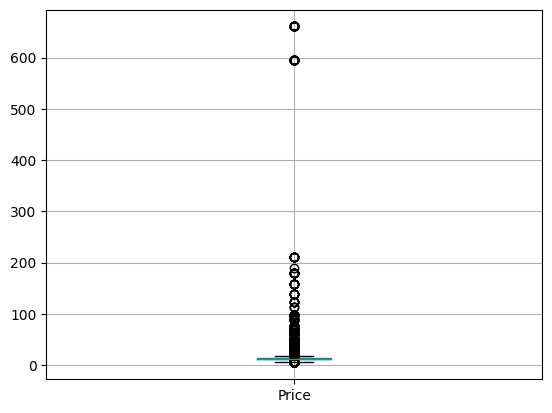

In [919]:
df.boxplot(column='Price')

# Checking outliers

<Axes: >

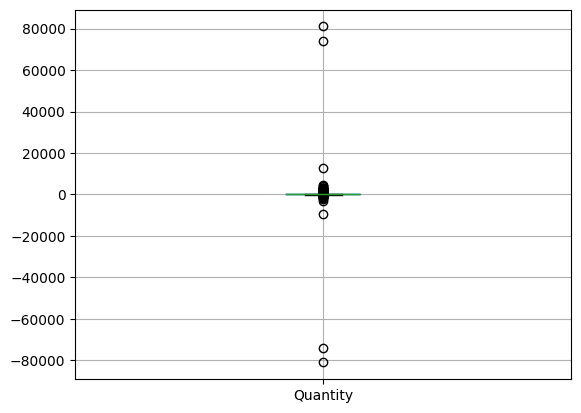

In [920]:
df.boxplot(column='Quantity')

In [921]:
df.describe(include='all')
# Looking for most sold product with 'ProductName' which is 'Cream Hanging Heart T-Light Holder'.
# There are 38 unique countries and United Kingdom being the most frequent in the dataset with 48 5095.

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
count,536350,536350,536350,536350,536350.000000,536350.000000,536295.000000,536350
unique,23204,305,3768,3768,NaN,NaN,NaN,38
top,573585,12/5/2019,85123A,Cream Hanging Heart T-Light Holder,NaN,NaN,NaN,United Kingdom
freq,1111,5299,2378,2378,NaN,NaN,NaN,485095
mean,NaN,NaN,NaN,NaN,12.662182,9.919347,15227.893178,NaN
std,NaN,NaN,NaN,NaN,8.490450,216.662300,1716.582932,NaN
min,NaN,NaN,NaN,NaN,5.130000,-80995.000000,12004.000000,NaN
25%,NaN,NaN,NaN,NaN,10.990000,1.000000,13807.000000,NaN
50%,NaN,NaN,NaN,NaN,11.940000,3.000000,15152.000000,NaN
75%,NaN,NaN,NaN,NaN,14.090000,10.000000,16729.000000,NaN


In [922]:
df['Country'].value_counts()
# Unspecified countries occurs 447 times.

,count
Country,
United Kingdom,485095
Germany,10675
France,10526
EIRE,8048
Belgium,2539
Spain,2430
Switzerland,2336
Netherlands,2330
Portugal,1848


#

# The goal is to build a linear regression model that predicts sales volume (Quantity) based on product price and country.

# Cleaning Up The Data

In [923]:
# Since the df 'Quantity' doesn't make sense with negative values, we are going to drop those rows (transactions).
before = len(df)
df = df[df['Quantity'] >= 0]
after = len(df)
print("Rows dropped:", before - after)

Rows dropped: 8585


In [924]:
# Nothing dropped.
before = len(df)
df.dropna(subset=["Quantity", "Price", "Country"])
after = len(df)
print("Rows dropped:", before - after)

Rows dropped: 0


In [925]:
# We are going to test to remove the outliers.
before = len(df)
df = df[(df['Price'] <= 600) & (df['Quantity'] <= 2000)]
after = len(df)
print("Rows dropped:", before - after)


Rows dropped: 51


In [926]:
df.describe()
# Trying out this dataset after cleaning.

,Price,Quantity,CustomerNo
count,527714.000000,527714.000000,527713.000000
mean,12.592872,10.178487,15231.649855
std,6.250600,33.453320,1716.527282
min,5.130000,1.000000,12004.000000
25%,10.990000,1.000000,13813.000000
50%,11.940000,3.000000,15159.000000
75%,14.090000,11.000000,16729.000000
max,594.500000,2000.000000,18287.000000


# Prepare For The Regression Model

**One-Hot Encoding**

In [927]:
# The five countries with most transactions.
df['Country'].value_counts().head(5)

,count
Country,
United Kingdom,477726
France,10393
Germany,10240
EIRE,7807
Belgium,2507


In [928]:
max = df['Price'].max()
min = df['Price'].min()
print("Max: ", max, "Min: ", min)

Max:  594.5 Min:  5.13


In [929]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# 1) Rensa text (om det finns blanksteg i ländernas namn)
df['Country'] = df['Country'].astype(str).str.strip()

# 2) Håll bara de fem länder du vill ha
df = df[df['Country'].isin(['United Kingdom', 'France', 'EIRE', 'Belgium', 'Germany'])]

# 3) Skapa och träna OneHotEncoder
cat_encoder = OneHotEncoder(handle_unknown='ignore')
df_cat_1hot = cat_encoder.fit_transform(df[['Country']])

# 4) Hämta korrekta kolumnnamn från encodern
feat_names = cat_encoder.get_feature_names_out(['Country'])

# 5) Gör DataFrame av encodade kolumner
df_encoded = pd.DataFrame(df_cat_1hot.toarray(), columns=feat_names, index=df.index)

# 6) Droppa United Kingdom (baslinje) om den finns med
uk_col = 'Country_United Kingdom'
if uk_col in df_encoded.columns:
    df_encoded = df_encoded.drop(columns=[uk_col])

# 7) Slå ihop med original-df
df = pd.concat([df, df_encoded], axis=1)

# 8) Kolla resultatet
print(df[['Country'] + list(df_encoded.columns)].head(10))

# 1. Räkna antal rader per land i originalet
print("Antal rader i original-df per land:")
print(df['Country'].value_counts())
print()

# 2. Summera 1:orna i de nya dummy-kolumnerna
dummy_cols = ['Country_France','Country_EIRE','Country_Belgium','Country_Germany']
print("Antal 1:or i dummy-kolumnerna:")
print(df[dummy_cols].sum())




          Country  Country_Belgium  Country_EIRE  Country_France  \
0  United Kingdom              0.0           0.0             0.0   
1  United Kingdom              0.0           0.0             0.0   
2  United Kingdom              0.0           0.0             0.0   
3  United Kingdom              0.0           0.0             0.0   
4  United Kingdom              0.0           0.0             0.0   
5  United Kingdom              0.0           0.0             0.0   
6  United Kingdom              0.0           0.0             0.0   
7  United Kingdom              0.0           0.0             0.0   
8  United Kingdom              0.0           0.0             0.0   
9  United Kingdom              0.0           0.0             0.0   

   Country_Germany  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
5              0.0  
6              0.0  
7              0.0  
8              0.0  
9              0.0  
Antal rader i origin

In [930]:
df.describe()

,Price,Quantity,CustomerNo,Country_Belgium,Country_EIRE,Country_France,Country_Germany
count,508673.000000,508673.000000,508672.000000,508673.000000,508673.000000,508673.000000,508673.000000
mean,12.589503,9.557507,15309.007541,0.004929,0.015348,0.020432,0.020131
std,6.251160,31.839107,1681.735197,0.070030,0.122932,0.141471,0.140448
min,5.130000,1.000000,12004.000000,0.000000,0.000000,0.000000,0.000000
25%,10.920000,1.000000,13969.000000,0.000000,0.000000,0.000000,0.000000
50%,11.940000,3.000000,15296.000000,0.000000,0.000000,0.000000,0.000000
75%,14.090000,10.000000,16764.000000,0.000000,0.000000,0.000000,0.000000
max,594.500000,2000.000000,18287.000000,1.000000,1.000000,1.000000,1.000000


# Create test and training set

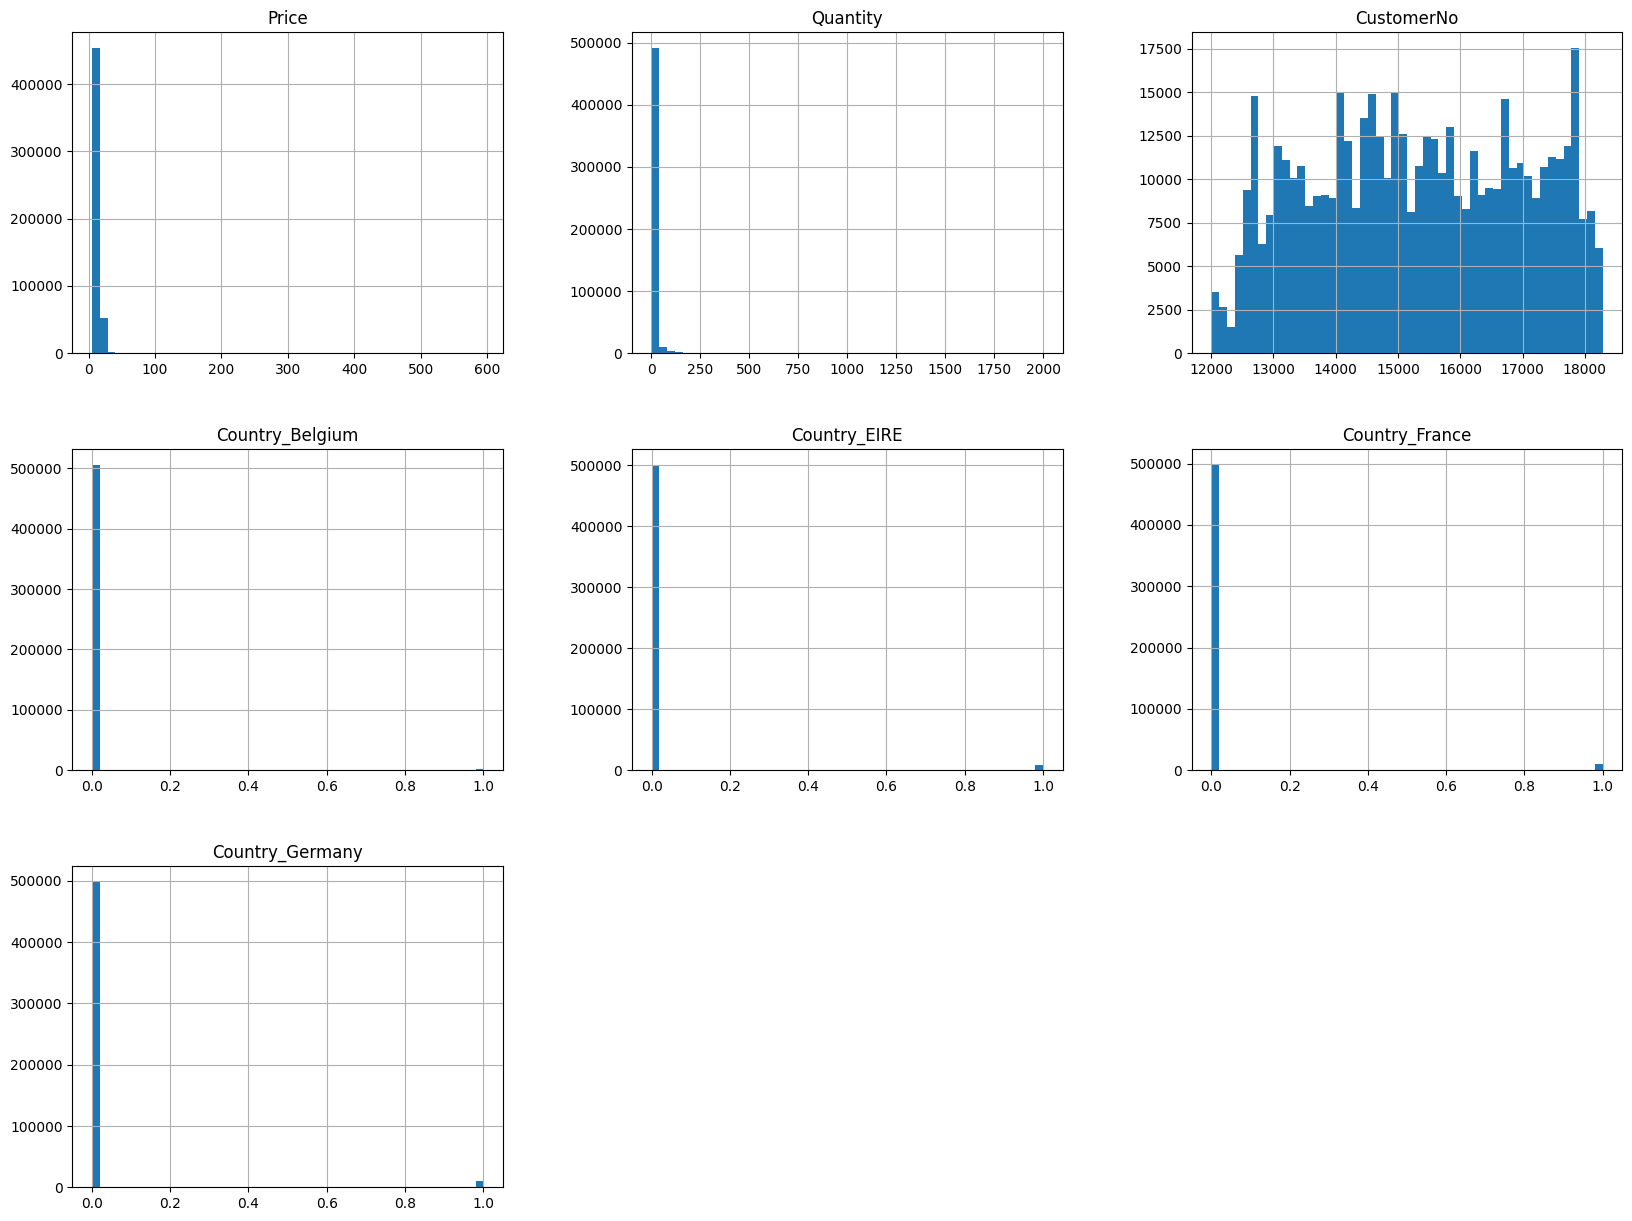

In [931]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()
